# Statistical Outlier Detection - IQR

We know that IQR is Q3 - Q1, and we can set the lower and upper bound by Q1 - 1.5IQR and Q3 + 1.5IQR. Boxplot automatically draws the lower/upper bound for us. We can also detect the data by defining a function.

## Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Read data in and print basic stats out

In [ ]:
df = pd.read_csv("/work/Nov2Temp.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   high    120 non-null    int64
 1   low     120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [ ]:
df.describe()

,high,low
count,120.00000,120.000000
mean,38.67500,15.158333
std,136.36864,133.241172
min,-998.00000,-998.000000
25%,48.00000,24.750000
50%,57.00000,32.000000
75%,66.25000,37.250000
max,99.00000,99.000000


## Deal with missing values

In [ ]:
df[df['low']<-100]

,high,low
72,-998,-998
79,-998,-998


In [ ]:
df[df['high']<-100]

,high,low
72,-998,-998
79,-998,-998


In [ ]:
df = df.drop([72,79]) 

In [ ]:
df.describe()

,high,low
count,118.000000,118.000000
mean,56.245763,32.330508
std,15.233755,14.575506
min,15.000000,-2.000000
25%,48.250000,25.000000
50%,57.500000,32.000000
75%,66.750000,37.750000
max,99.000000,99.000000


In [ ]:
df.shape

(118, 2)

## Check for outliers

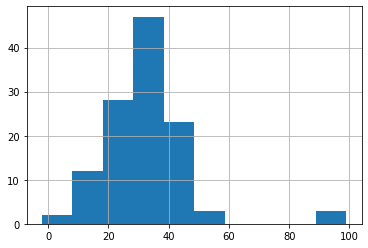

In [ ]:
df['low'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f75983d7f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f75983e0f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f75983e6f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f75983e6a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f75983e04d0>,
  <matplotlib.lines.Line2D at 0x7f75983e0a10>]}

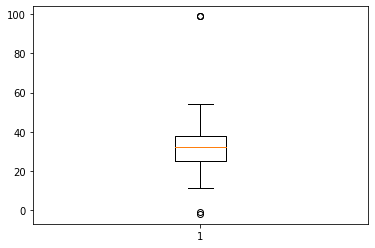

In [ ]:
plt.boxplot(df['low'])

## Setup thresholds

In [ ]:
low_IQR = df['low'].quantile(0.75) - df['low'].quantile(0.25)
low_low_limit = df['low'].quantile(0.25) - 1.5 * low_IQR

print(low_low_limit)

5.875


In [ ]:
low_high_limit = df['low'].quantile(0.75) + 1.5 * low_IQR

print(low_high_limit)

56.875


In [ ]:
df[df['low'] < low_low_limit] 

,high,low
41,41,-2
81,18,-1


In [ ]:
df[df['low'] > low_high_limit] 

,high,low
111,48,99
112,43,99
113,64,99


In [ ]:
df.drop(df[df['low'] < low_low_limit].index, inplace = True)

In [ ]:
df.drop(df[df['low'] > low_high_limit].index, inplace = True)

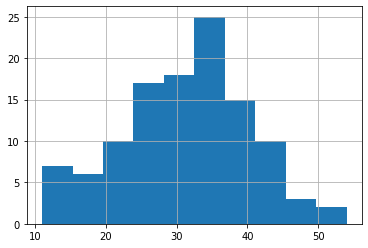

In [ ]:
df['low'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f75982f9250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7598300250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7598288290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7598300d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f75982f9790>,
  <matplotlib.lines.Line2D at 0x7f75982f9cd0>]}

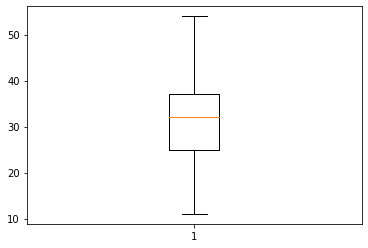

In [ ]:
plt.boxplot(df['low'])

# Inclass Practice

Inclass practice: 
Let's do the same thing for df['high'], and df['avg'] (( high-low) / 2)

# Optional Practice

Requirement:
Define a function outlier_remover(df) that takes a dataframe df, remove the statistical outliers (defined as data outside lower/upper limit range), and return a df without outliers.